In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.special import expit

#### Playground

In [74]:
# Mode == Weights

D_j = 0.5 

player = [0.1, 0.5, 0.9]
player_label = ['safe', 'random', 'risky']

question = [0.9, 0.5, 0.1]
question_label = ['low information', 'medium information', 'high information']

for i,p in enumerate(player):
    for j,q in enumerate(question):
        prob = p * (1-q) + D_j * q
        print(f'Player {player_label[i]} with question {question_label[j]} ---> Prob to answer risky = {prob:.2f}')
    print('')

Player safe with question low information ---> Prob to answer risky = 0.46
Player safe with question medium information ---> Prob to answer risky = 0.30
Player safe with question high information ---> Prob to answer risky = 0.14

Player random with question low information ---> Prob to answer risky = 0.50
Player random with question medium information ---> Prob to answer risky = 0.50
Player random with question high information ---> Prob to answer risky = 0.50

Player risky with question low information ---> Prob to answer risky = 0.54
Player risky with question medium information ---> Prob to answer risky = 0.70
Player risky with question high information ---> Prob to answer risky = 0.86



In [75]:
# Mode == Rasch

player = [0.1, 0.5, 0.9]
player_label = ['safe', 'random', 'risky']

question = [0.1, 0.5, 0.9]
question_label = ['high risk bias', 'medium risk bias', 'low risk bias']

for i,p in enumerate(player):
    for j,q in enumerate(question):
        prob = 1/(1+math.exp(q-p))
        print(f'Player {player_label[i]} with question {question_label[j]} ---> Prob to answer risky = {prob:.2f}')
    print('')

Player safe with question high risk bias ---> Prob to answer risky = 0.50
Player safe with question medium risk bias ---> Prob to answer risky = 0.40
Player safe with question low risk bias ---> Prob to answer risky = 0.31

Player random with question high risk bias ---> Prob to answer risky = 0.60
Player random with question medium risk bias ---> Prob to answer risky = 0.50
Player random with question low risk bias ---> Prob to answer risky = 0.40

Player risky with question high risk bias ---> Prob to answer risky = 0.69
Player risky with question medium risk bias ---> Prob to answer risky = 0.60
Player risky with question low risk bias ---> Prob to answer risky = 0.50



In [79]:
# Mode == Rasch_2

player = [-2, 0, 1]
player_label = ['safe', 'random', 'risky']

question = [0.2, 0.55, 0.9]
question_label = ['low information', 'medium information', 'high information']

for i,p in enumerate(player):
    for j,q in enumerate(question):
        prob = 1/(1+math.exp(-p*q))
        print(f'Player {player_label[i]} with question {question_label[j]} ---> Prob to answer risky = {prob:.2f}')
    print('')

Player safe with question low information ---> Prob to answer risky = 0.40
Player safe with question medium information ---> Prob to answer risky = 0.25
Player safe with question high information ---> Prob to answer risky = 0.14

Player random with question low information ---> Prob to answer risky = 0.50
Player random with question medium information ---> Prob to answer risky = 0.50
Player random with question high information ---> Prob to answer risky = 0.50

Player risky with question low information ---> Prob to answer risky = 0.55
Player risky with question medium information ---> Prob to answer risky = 0.63
Player risky with question high information ---> Prob to answer risky = 0.71



## Simulator

In [ ]:
### Inputs 

n_players = 500
prevalence_profiles = [0.3, 0.2, 0.5]  # Must add to 1

D_j = 0.5

n_questions = 15
questions_output = {'risky_answer': 1,
                    'safe_answer' : 0}

profiles_dict = {'risky' : 1,
                 'random': 0,
                 'safe'  : -2}

### Players

class Player:
  def __init__(self, profile='random'):
    self.profile = profile
    self.risk_prob = profiles_dict.get(profile)

  def play_game(self, game, mode='rasch_2'):
    answers_player = []
    for question in game.difficulty_questions:
      if mode == 'weights':
        # Prob. to answer risky = p(i) * (1-W(j)) + D(j) * W(j)
        prob_answer_risky = self.risk_prob * (1-question) + D_j * question
      elif mode == 'rasch':
        # Prob. to answer risky = 1 / 1+e^(Q-P)
        prob_answer_risky = 1/(1 + math.exp(question - self.risk_prob))
      elif mode == 'rasch_2':
        # Prob. to answer risky = 1 / 1+e^(-P*Q)
        prob_answer_risky = 1/(1 + math.exp(-self.risk_prob * question))
      prob_answer_safe = 1 - prob_answer_risky
      answer = np.random.choice(list(questions_output.values()), p=[prob_answer_risky, prob_answer_safe])
      answers_player.append(answer)
    # Add profile
    answers_player.append(self.profile)
    return answers_player


### Game

class Game:
  def __init__(self, n=10):
    low_limit = 0.2
    high_limit = 0.9
    self.difficulty_questions = np.random.uniform(low=low_limit, high=high_limit, size=n)
  
  def get_len_game(self):
    return len(self.difficulty_questions)

In [ ]:
# Columns names

columns_names = []
dict_types = {}
for j in range(n_questions):
  name = f'Q_{j+1}'
  dict_types[name] = int
  columns_names.append(name)
columns_names.append('profile')

## Let's Play!!

In [ ]:
# Create game
game_1 = Game(n=n_questions)

# Create players
def generate_players(profiles: dict, n_players: int, prevalence: list):
  array_profiles = np.random.choice(list(profiles.keys()), size=n_players, p=prevalence)
  return [Player(prof) for prof in array_profiles]

lst_players = generate_players(profiles=profiles_dict, n_players=n_players, prevalence=prevalence_profiles)

In [ ]:
# Create Dataframe
Dataset = pd.DataFrame(columns=columns_names)

# Play!
for participant in lst_players:
  answers = participant.play_game(game_1, mode='rasch_2')
  Dataset.loc[Dataset.shape[0]] = answers

Dataset.to_csv('Data_V1.csv')
Dataset

,Q_1,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8,Q_9,Q_10,Q_11,Q_12,Q_13,Q_14,Q_15,profile
0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,1,risky
1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,safe
2,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,risky
3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,safe
4,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,safe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,0,0,0,1,1,1,0,0,0,0,0,1,1,0,risky
496,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,safe
497,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,safe
498,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,safe


### Analyze the data

In [ ]:
data_1 = Dataset[Dataset.columns[:-1]]
questions = [sum(data_1.iloc[:, i]==1) for i in range(data_1.shape[1])]

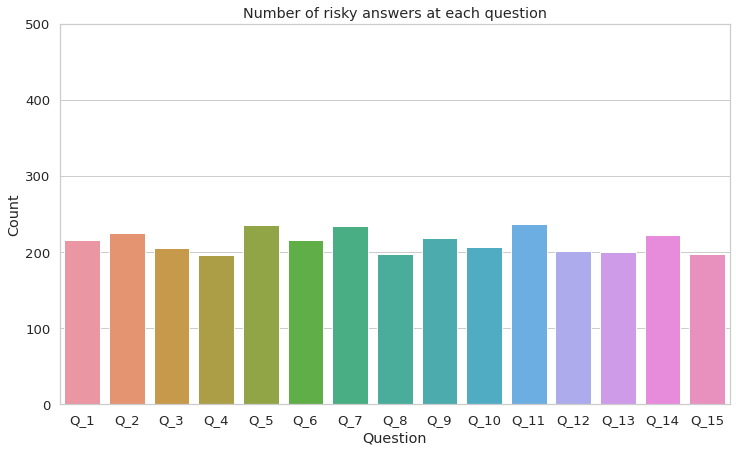

In [ ]:
sns.set(font_scale = 1.2)
sns.set_style("whitegrid")
plt.figure(figsize=(12,7))

sns.barplot(x=columns_names[:-1], y=questions)

plt.ylim(0,len(data_1))
plt.xlabel('Question')
plt.ylabel('Count')
plt.title('Number of risky answers at each question')
plt.show()

In [ ]:
data_sum = data_1.sum(axis=1)

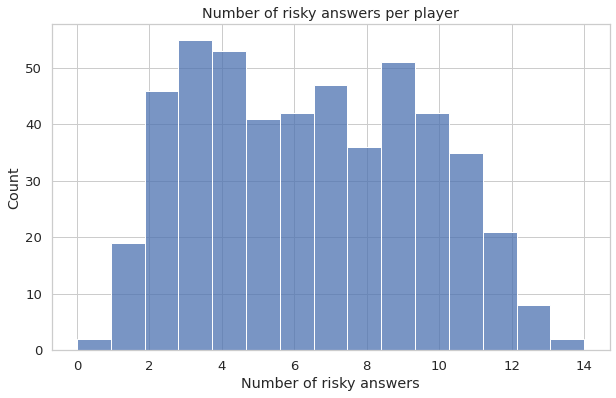

In [ ]:
sns.set(font_scale = 1.2)
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))

sns.histplot(data_sum, bins=n_questions)

plt.xlabel('Number of risky answers')
plt.ylabel('Count')
plt.title('Number of risky answers per player')
plt.show()

## Inference: Bayesian Rasch Model

In [ ]:
!pip install --upgrade pystan

In [ ]:
!pip install nest-asyncio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nest_asyncio
nest_asyncio.apply()

In [50]:
import stan

model_stan = """
data {
  int<lower=1> J;                     // number of students
  int<lower=1> K;                     // number of questions
  int<lower=1> N;                     // number of observations
  array[N] int<lower=1, upper=J> jj;  // student for observation n
  array[N] int<lower=1, upper=K> kk;  // question for observation n
  array[N] int<lower=0, upper=1> y;   // correctness for observation n
}

parameters {
  real delta;            // mean student ability
  array[J] real alpha;   // ability of student j - mean ability
  array[K] real beta;    // difficulty of question k
}

model {
  alpha ~ normal(0, 1); // informative true prior
  beta ~ normal(0, 1); // informative true prior
  delta ~ normal(.75, 1); // informative true prior
  for (n in 1 : N) {
    y[n] ~ bernoulli_logit(alpha[jj[n]] - beta[kk[n]] + delta);
  }
}
"""
n_obs = n_players * n_questions

# Create array jj
players_obs = []
for i in range(n_players):
  players_obs.extend([i+1]*n_questions)

# Create array kk
questions_obs = list(range(1, n_questions+1))
questions_obs = questions_obs*n_players

# Create arra y
answers_obs = data_1.values.flatten()

data_stan = {'J':n_players, 
             'K':n_questions, 
             'N':n_obs, 
             'jj':players_obs, 
             'kk':questions_obs,  
             'y':answers_obs}

posterior = stan.build(model_stan, data=data_stan)
fit = posterior.sample(num_chains=4, num_samples=1000)
#eta = fit["eta"]  # array with shape (8, 4000)

df = fit.to_frame()  # pandas `DataFrame, requires pandas
df.values

Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/8000)
Sampling:   0% (2/8000)
Sampling:   1% (101/8000)
Sampling:   2% (200/8000)
Sampling:   4% (300/8000)
Sampling:   5% (400/8000)
Sampling:   6% (500/8000)
Sampling:   8% (600/8000)
Sampling:   9% (700/8000)
Sampling:  10% (800/8000)
Sampling:  11% (900/8000)
Sampling:  12% (1000/8000)
Sampling:  14% (1100/8000)
Sampling:  15% (1200/8000)
Sampling:  16% (1300/8000)
Sampling:  18% (1400/8000)
Sampling:  19% (1500/8000)
Sampling:  20% (1600/8000)
Sampling:  21% (1700/8000)
Sampling:  22% (1800/8000)
Sampling:  23% (1801/8000)
Sampling:  24% (1901/8000)
Sampling:  25% (2000/8000)
Sampling:  26% (2100/8000)
Sampling:  26% (2101/8000)
Sampling:  28% (2200/8000)
Sampling:  29% (2300/8000)
Sampling:  30% (2400/8000)
Sampling:  31% (2500/8000)
Sampling:  32% (2600/8000)
Sampling:  34% (2700/8000)
Sampling:  35% (2800/8000)
Sampling:  36% (2900/8000)
Sampling:  38% (3000/8000)
Sampling:  39% (3100/8000)
Sampling:  40% (3200/80

AssertionError: ignored

In [83]:
import stan

model_stan = """
data {
  int<lower=1> J;                     // number of students
  int<lower=1> K;                     // number of questions
  int<lower=1> N;                     // number of observations
  array[N] int<lower=1, upper=J> jj;  // student for observation n
  array[N] int<lower=1, upper=K> kk;  // question for observation n
  array[N] int<lower=0, upper=1> y;   // correctness for observation n
}

parameters {
  array[J] real alpha;   // ability of student j
  array[K] real <lower=0, upper=1> beta;    // difficulty of question k
}

model {
  alpha ~ normal(0, 4); // informative true prior
  beta ~ beta(1, 1); // informative true prior
  for (n in 1 : N) {
    y[n] ~ bernoulli_logit(alpha[jj[n]] * beta[kk[n]]);
  }
}
"""
n_obs = n_players * n_questions

# Create array jj
players_obs = []
for i in range(n_players):
  players_obs.extend([i+1]*n_questions)

# Create array kk
questions_obs = list(range(1, n_questions+1))
questions_obs = questions_obs*n_players

# Create arra y
answers_obs = data_1.values.flatten()

data_stan = {'J':n_players, 
             'K':n_questions, 
             'N':n_obs, 
             'jj':players_obs, 
             'kk':questions_obs,  
             'y':answers_obs}

posterior = stan.build(model_stan, data=data_stan)
fit = posterior.sample(num_chains=4, num_samples=1000)
#eta = fit["eta"]  # array with shape (8, 4000)

df = fit.to_frame()  # pandas `DataFrame, requires pandas
df.values

Building...



Building: 29.4s, done.Sampling:   0%
Sampling:   0% (1/8000)
Sampling:   0% (2/8000)
Sampling:   1% (101/8000)
Sampling:   2% (200/8000)
Sampling:   4% (300/8000)
Sampling:   5% (400/8000)
Sampling:   6% (500/8000)
Sampling:   8% (600/8000)
Sampling:   9% (700/8000)
Sampling:  10% (800/8000)
Sampling:  11% (900/8000)
Sampling:  12% (1000/8000)
Sampling:  14% (1100/8000)
Sampling:  15% (1200/8000)
Sampling:  16% (1300/8000)
Sampling:  18% (1400/8000)
Sampling:  19% (1500/8000)
Sampling:  20% (1600/8000)
Sampling:  21% (1700/8000)
Sampling:  22% (1800/8000)
Sampling:  24% (1901/8000)
Sampling:  25% (2002/8000)
Sampling:  26% (2101/8000)
Sampling:  28% (2200/8000)
Sampling:  29% (2300/8000)
Sampling:  30% (2400/8000)
Sampling:  31% (2500/8000)
Sampling:  32% (2600/8000)
Sampling:  34% (2700/8000)
Sampling:  35% (2800/8000)
Sampling:  36% (2900/8000)
Sampling:  38% (3000/8000)
Sampling:  39% (3100/8000)
Sampling:  40% (3200/8000)
Sampling:  41% (3300/8000)
Sampling:  42% (3400/8000)
Sampl

array([[-4.75893563e+03,  9.74098151e-01,  2.73832073e-01, ...,
         3.39961583e-01,  1.89883122e-01,  3.24023122e-01],
       [-4.73151638e+03,  1.00000000e+00,  3.05426891e-01, ...,
         2.88213515e-01,  1.05661096e-01,  3.61498641e-01],
       [-4.78423793e+03,  6.70127764e-01,  2.71221640e-01, ...,
         2.89970403e-01,  1.52068230e-01,  1.98286612e-01],
       ...,
       [-4.76112875e+03,  1.00000000e+00,  3.05426891e-01, ...,
         3.57620153e-01,  2.35835199e-01,  3.82557745e-01],
       [-4.74421561e+03,  9.52120665e-01,  2.71221640e-01, ...,
         3.35082418e-01,  1.66536106e-01,  3.78416381e-01],
       [-4.75475670e+03,  9.80278186e-01,  3.14828668e-01, ...,
         2.96535808e-01,  1.67193106e-01,  3.54393485e-01]])

In [52]:
fit

<stan.Fit>
Parameters:
    delta: ()
    alpha: (500,)
    beta: (15,)
Draws: 4000

In [84]:
df = fit.to_frame()  # pandas `DataFrame, requires pandas
df

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha.1,alpha.2,alpha.3,...,beta.6,beta.7,beta.8,beta.9,beta.10,beta.11,beta.12,beta.13,beta.14,beta.15
draws,,,,,,,,,,,,,,,,,,,,,
0,-4758.935631,0.974098,0.273832,4.0,15.0,0.0,5043.609686,3.644752,-6.263294,7.581514,...,0.312330,0.035211,0.260206,0.162200,0.235486,0.133436,0.073309,0.339962,0.189883,0.324023
1,-4731.516383,1.000000,0.305427,4.0,15.0,0.0,4987.869172,4.709694,-8.082925,5.115525,...,0.317466,0.031324,0.262859,0.223138,0.347771,0.100897,0.100748,0.288214,0.105661,0.361499
2,-4784.237927,0.670128,0.271222,4.0,15.0,0.0,5021.681998,3.208076,-9.800221,6.234378,...,0.388162,0.065797,0.251557,0.204284,0.266023,0.086013,0.101151,0.289970,0.152068,0.198287
3,-4734.709865,0.680593,0.314829,4.0,15.0,0.0,4989.014878,5.210543,-6.506729,7.225902,...,0.331103,0.101605,0.198585,0.283850,0.275060,0.081109,0.096641,0.324739,0.226897,0.344271
4,-4753.424407,1.000000,0.273832,4.0,15.0,0.0,5009.398839,2.745390,-7.426415,3.107931,...,0.339355,0.069519,0.221719,0.237842,0.340360,0.097281,0.117410,0.384304,0.134682,0.358971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-4749.663406,0.833815,0.314829,4.0,15.0,0.0,4991.678172,2.534493,-2.160073,2.638735,...,0.477091,0.049890,0.252312,0.221621,0.302741,0.070368,0.084133,0.285469,0.241217,0.383771
3996,-4761.290636,0.582506,0.273832,4.0,15.0,0.0,5014.872670,-0.275567,-3.654998,5.790459,...,0.358316,0.056961,0.283035,0.273730,0.337994,0.105966,0.114908,0.374478,0.147481,0.347789
3997,-4761.128750,1.000000,0.305427,4.0,15.0,0.0,5056.329567,0.483442,-4.928746,8.766719,...,0.352753,0.076740,0.232814,0.217164,0.337797,0.096854,0.105028,0.357620,0.235835,0.382558


### Results

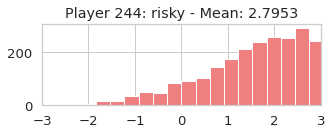

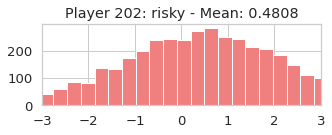

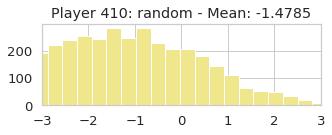

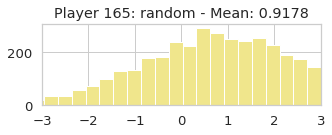

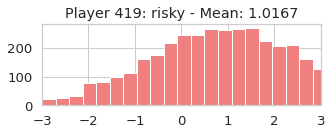

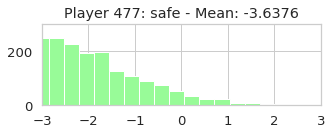

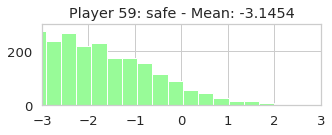

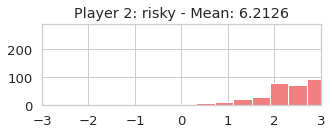

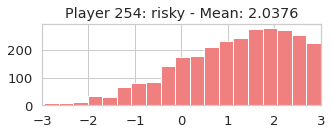

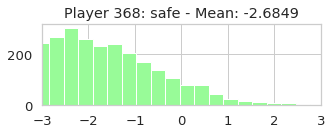

In [85]:
players_plot = np.random.randint(1, 501, size=10)
for i in players_plot:
    # profile
    profile = Dataset.iloc[i,-1] 
    if profile == 'risky':
        color_hist = 'lightcoral'
    elif profile == 'random':
        color_hist = 'khaki'
    elif profile == 'safe':
        color_hist = 'palegreen'
    plt.figure(figsize=(5,1.5))
    plt.grid(True)
    plt.xlim([-3, 3])
    column_name = f'alpha.{i+1}'
    plt.hist(df[column_name], bins='auto', color=color_hist)
    plt.title(f'Player {i}: {profile} - Mean: {df[column_name].mean():.4f}')
    plt.show()

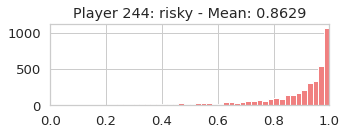

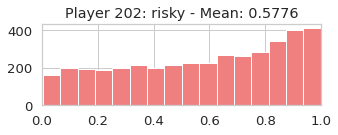

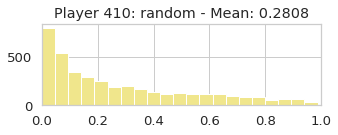

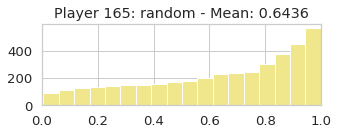

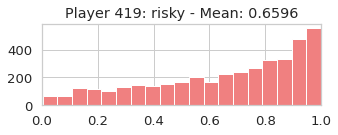

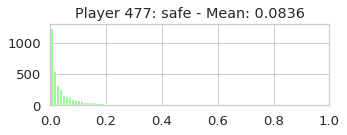

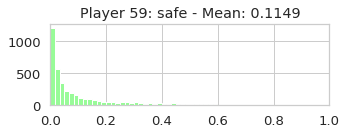

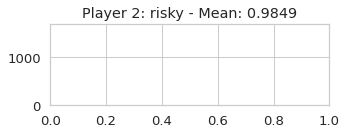

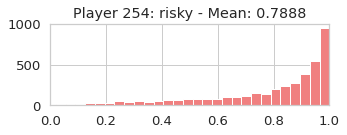

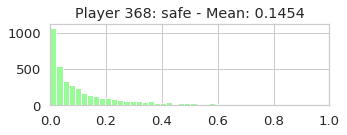

In [86]:
# Expit
for i in players_plot:
    # profile
    profile = Dataset.iloc[i,-1] 
    if profile == 'risky':
        color_hist = 'lightcoral'
    elif profile == 'random':
        color_hist = 'khaki'
    elif profile == 'safe':
        color_hist = 'palegreen'
    plt.figure(figsize=(5,1.5))
    plt.grid(True)
    plt.xlim([0, 1])
    column_name = f'alpha.{i+1}'
    plt.hist(expit(df[column_name]), bins='auto', color=color_hist)
    plt.title(f'Player {i}: {profile} - Mean: {expit(df[column_name]).mean():.4f}')
    plt.show()

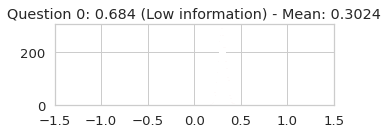

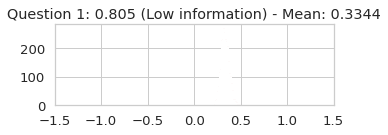

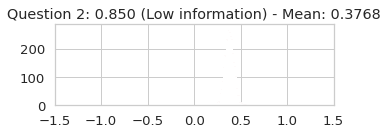

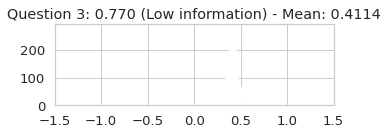

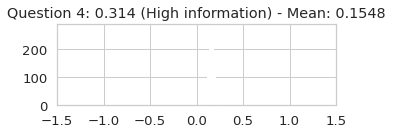

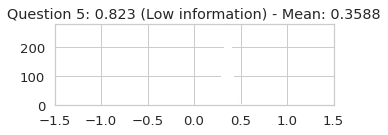

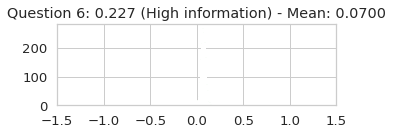

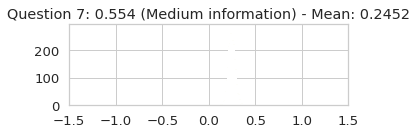

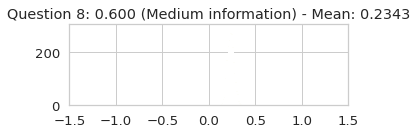

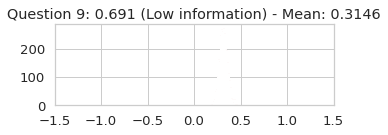

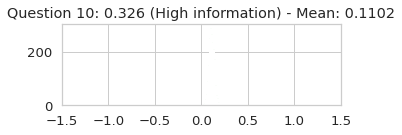

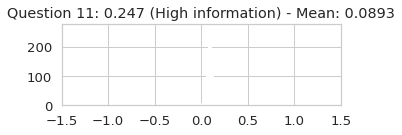

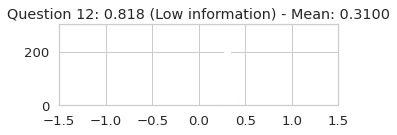

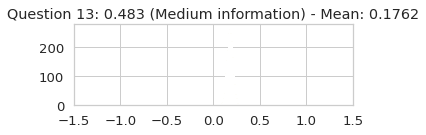

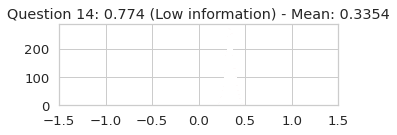

In [87]:
for i in range(n_questions):
    # difficulty
    difficulty = game_1.difficulty_questions[i]
    if 0.66 <= difficulty < 1:
        diff_label = 'Low information'
        color_hist = 'lightcoral'
    elif 0.33 <= difficulty < 0.66:
        diff_label = 'Medium information'
        color_hist = 'khaki'
    elif 0 <= difficulty < 0.33:
        diff_label = 'High information'
        color_hist = 'palegreen'
    plt.figure(figsize=(5,1.5))
    plt.grid(True)
    plt.xlim([-1.5, 1.5])
    column_name = f'beta.{i+1}'
    plt.hist(df[column_name], bins='auto', color=color_hist)
    plt.title(f'Question {i}: {difficulty:.3f} ({diff_label}) - Mean: {df[column_name].mean():.4f}')
    plt.show()

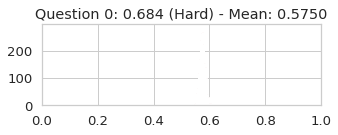

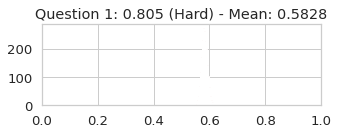

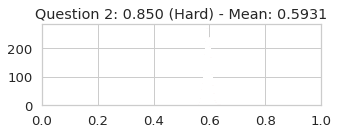

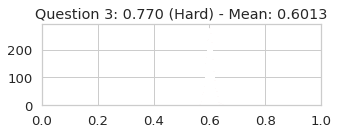

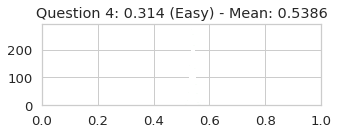

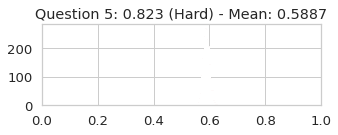

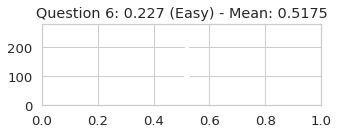

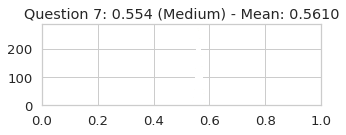

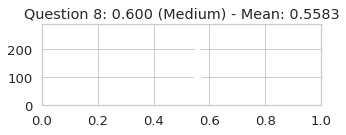

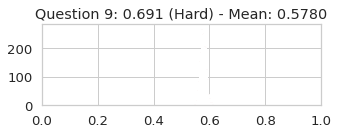

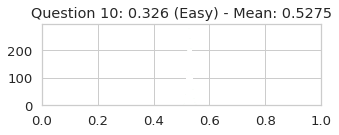

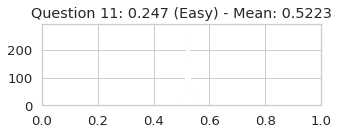

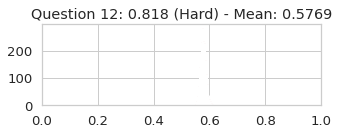

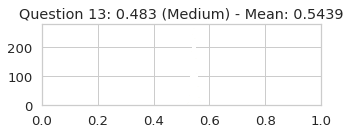

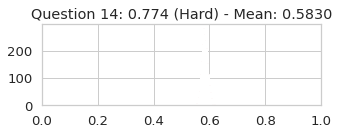

In [88]:
# Expit
for i in range(n_questions):
    # difficulty
    difficulty = game_1.difficulty_questions[i]
    if 0.66 <= difficulty < 1:
        diff_label = 'Hard'
        color_hist = 'lightcoral'
    elif 0.33 <= difficulty < 0.66:
        diff_label = 'Medium'
        color_hist = 'khaki'
    elif 0 <= difficulty < 0.33:
        diff_label = 'Easy'
        color_hist = 'palegreen'
    plt.figure(figsize=(5,1.5))
    plt.grid(True)
    plt.xlim([0, 1])
    column_name = f'beta.{i+1}'
    plt.hist(expit(df[column_name]), bins='auto', color=color_hist)
    plt.title(f'Question {i}: {difficulty:.3f} ({diff_label}) - Mean: {expit(df[column_name]).mean():.4f}')
    plt.show()